# Machine learning framework for prediction of patient-hospital readmission in US
### Part 1: Data Preparation
#### Author: Sai chandrika Peeta
##### Modified: May 2023

### Contents
* [I. Dataset description](#I.-Dataset-description)
    * [1. Loading the dataset](#1.-Loading-the-dataset)

* [II. Data preparation](#II.-Data-preparation)
       
    * [1. Removing columns with an unique value](#1.-Removing-columns-with-an-unique-value)
    * [2. Duplicates](#2.-Duplicates)
    * [3. Removing death and hospice people ](#3.-Removing-death-and-hospice-people)
    * [4. Missing Values](#4.-Missing-Values)
    * [5. Recategorization](#5.-Recategorization)
    * [6. Checking the distribution of other categorical attributes](#6.-Checking-the-distribution-of-other-categorical-attributes)
    * [7. Removing the unknown gender](#7.-Removing-the-unknown-gender)
    * [8. Categories for ages](#8.-Categories-for-ages)
    * [9. Categories for Readmitted](#9.-Categories-for-Readmitted)
    * [10. Categories for Primary Diagnosis](#10.Categories-for-Primary-Diagnosis)
    * [11. One hot Encoding](#11.-One-hot-Encoding)
* [III. Loading the final dataset](#I.-Loading-the-final-dataset)
* [IV. Model Performance](#II.-Model-Performance)
* [V. Unbalanced dataset](#III.-Unbalanced-dataset)
    * [1. Logistic Regression](#1.-Logistic-Regression)
    * [2. Weighted Logistic Regression](#2.-Weighted-Logistic-Regression)
    * [3. Artificial Neuronal Network](#3.-Artificial-Neuronal-Network)
    * [Model comparision](#Model-comparision)
* [VI. Oversampling](#IV.-Oversampling )
    * [1. Logistic Regression](#1.-Logistic-Regression-Model)
    * [2. KNeighbors](#2.-KNeighbors)
    * [3. Decision Tree Classifier](#3.-Decision-Tree-Classifier)
    * [4. Random Forest](#4.-Random-Forest)
    * [Model Comparision](#Model-Comparision)
* [VII. Insights](#V.-Insights)
* [VIII. Conclusions](#VI.-Conclusions)

## I. Dataset description

The dataset is available in the UCI repository as [Diabetes 130-US hospitals for years 1999-2008 Data Set](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008#). 

- The data was collected from 130 hospitals in the U.S. during 10 years(1999-2008)
- Contains 101,766 observations and 50 features, including demographic attributes, diagnostics, medications and hospital outcome.


#### 1. Loading the dataset

In [3]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=b95bb31fddab7be7b9bf3368df8a96930aa7448e46b998a320eec030a27508e0
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [67]:
# Basic Import
from __future__ import absolute_import, division, print_function, unicode_literals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.feature_selection import f_regression
from sklearn.model_selection import GridSearchCV
from collections import Counter
from imblearn.over_sampling import SMOTE
from yellowbrick.model_selection import FeatureImportances
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Activation, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras. metrics import FalseNegatives, FalsePositives, TrueNegatives
from tensorflow.keras. metrics import TruePositives, Precision, Recall
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks
import seaborn as sns
import time
import pingouin as pg

sns.set()

In [5]:
dataset=pd.read_csv('/content/diabetic_data.csv',na_values=["?"],low_memory=False)
print('The input contains', dataset.shape[0], 'rows and ' , dataset.shape[1], 'columns')

The input contains 101766 rows and  50 columns


In [6]:
dataset.info()
dataset.isna().sum()
dataset.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

0

In [7]:
# Check for cat variables and and special characters
for column, values in dataset.iteritems():
    unique_values = values.sort_values().unique()
    print(f"Unique values in column '{column}': {unique_values}")

num = dataset.select_dtypes(exclude=['object'])

<ipython-input-7-4755649539d4>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, values in dataset.iteritems():


Unique values in column 'encounter_id': [    12522     15738     16680 ... 443854148 443857166 443867222]
Unique values in column 'patient_nbr': [      135       378       729 ... 189445127 189481478 189502619]
Unique values in column 'race': ['AfricanAmerican' 'Asian' 'Caucasian' 'Hispanic' 'Other' nan]
Unique values in column 'gender': ['Female' 'Male' 'Unknown/Invalid']
Unique values in column 'age': ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
Unique values in column 'weight': ['>200' '[0-25)' '[100-125)' '[125-150)' '[150-175)' '[175-200)' '[25-50)'
 '[50-75)' '[75-100)' nan]
Unique values in column 'admission_type_id': [1 2 3 4 5 6 7 8]
Unique values in column 'discharge_disposition_id': [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24 25
 27 28]
Unique values in column 'admission_source_id': [ 1  2  3  4  5  6  7  8  9 10 11 13 14 17 20 22 25]
Unique values in column 'time_in_hospital': [ 1  2  3  4  

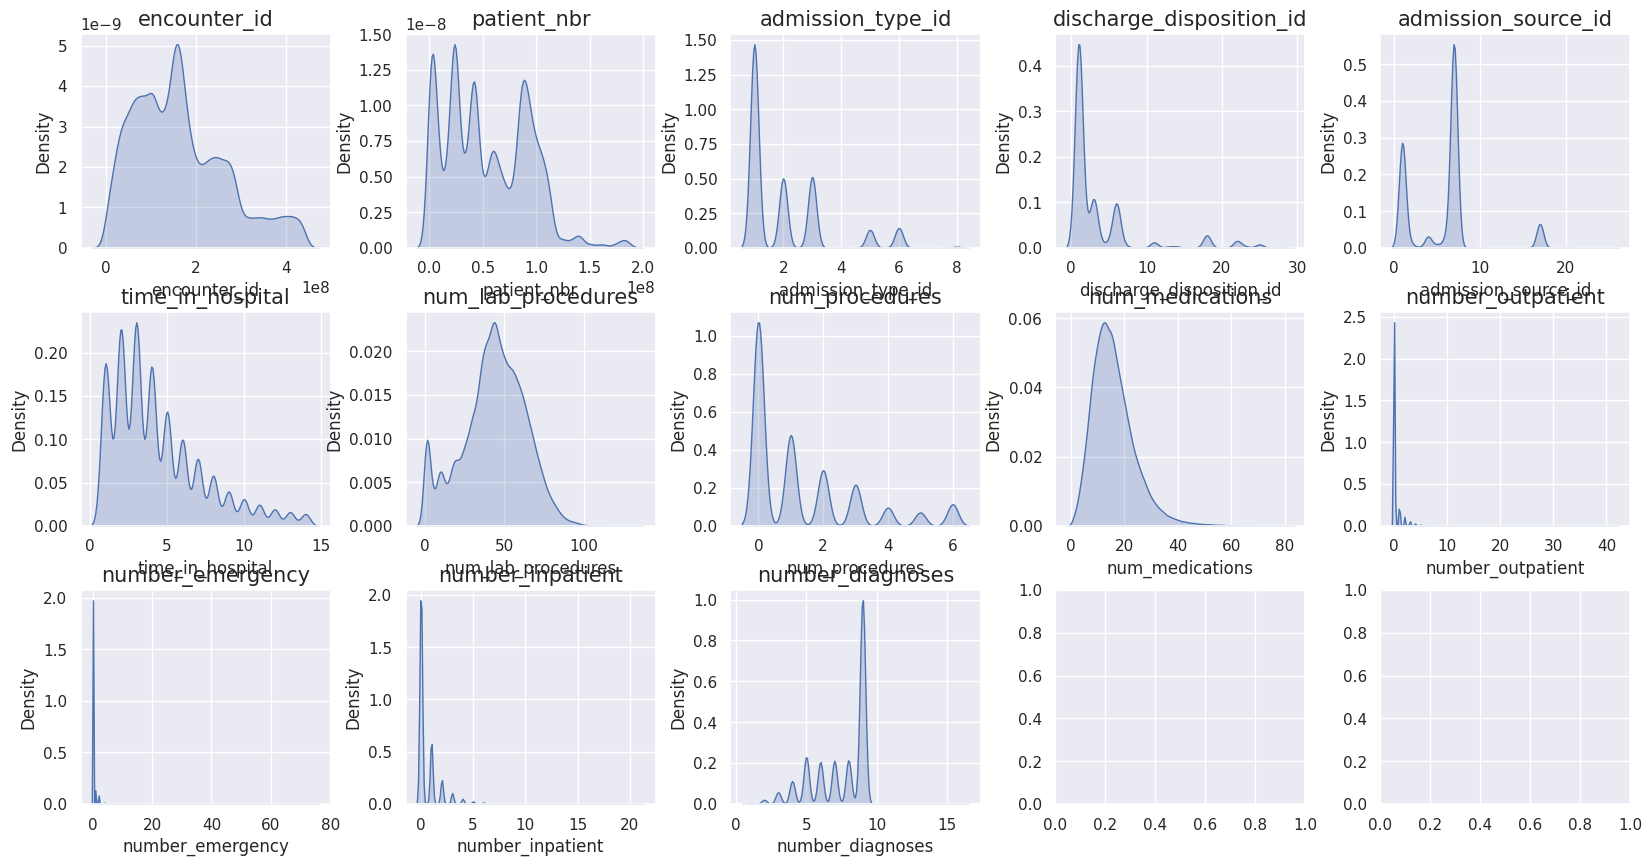

In [8]:
# Plot data distribution
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
sns.set_style('dark')
sns.set_palette('Blues_r')

for ax, col in zip(axes.flatten(), num.columns):
    sns.kdeplot(num[col], ax=ax, fill=True)
    ax.set_title(col, fontsize=15)

plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.show()


Subplot distribution and outliers.


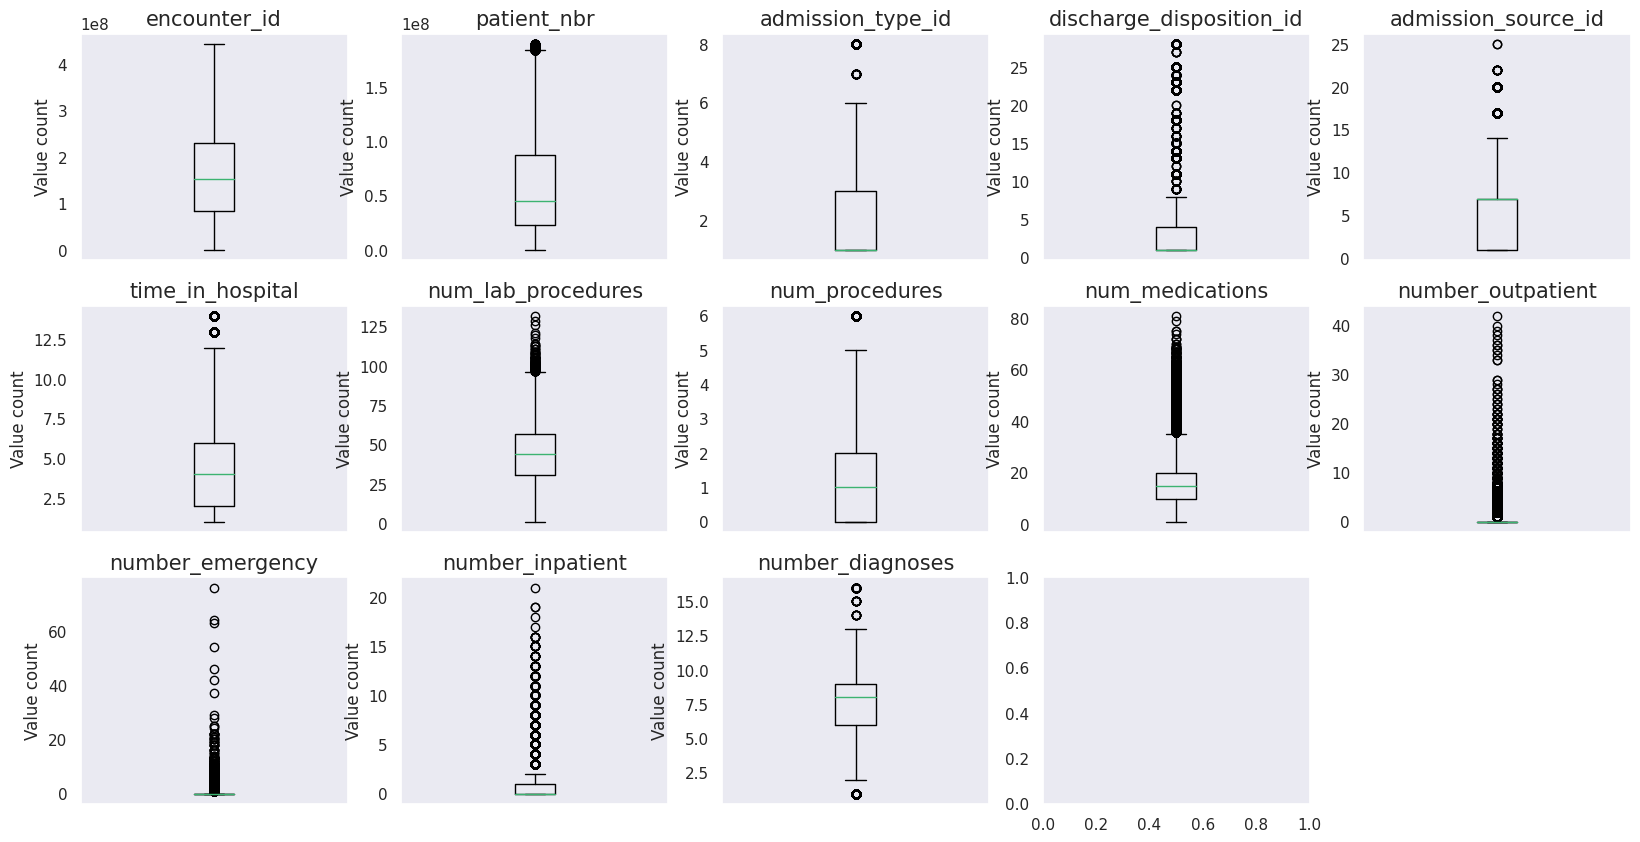

In [9]:
# Plot Basic statistic and outliers
print('Subplot distribution and outliers.')
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
axes[-1, -1].remove()
sns.set_palette('bright')

# Iterate over the axes and the columns to fill the subplots with boxplots
for ax, col in zip(axes.flatten(), num.columns):
    ax.boxplot(num[col], medianprops={'color': 'mediumseagreen'})
    ax.set_title(col, fontsize=15)
    ax.set_ylabel('Value count')
    ax.set_xticks([])

plt.subplots_adjust(hspace=0.2, wspace=0.2)

plt.show()

In [10]:
dataset.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [11]:
# Inspecting outliers
Q1 = num.quantile(0.25)
Q3 = num.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = num[(num < lower_bound) | (num > upper_bound)]

print(
    f"The total number of outliers is: {outliers.count().sum()}\n\nNumber of outliers in each columns:\n{outliers.count()}")


The total number of outliers is: 62720

Number of outliers in each columns:
encounter_id                    0
patient_nbr                   247
admission_type_id             341
discharge_disposition_id     9818
admission_source_id          6956
time_in_hospital             2252
num_lab_procedures            143
num_procedures               4954
num_medications              2557
number_outpatient           16739
number_emergency            11383
number_inpatient             7049
number_diagnoses              281
dtype: int64


<ipython-input-12-5d87de8e45db>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


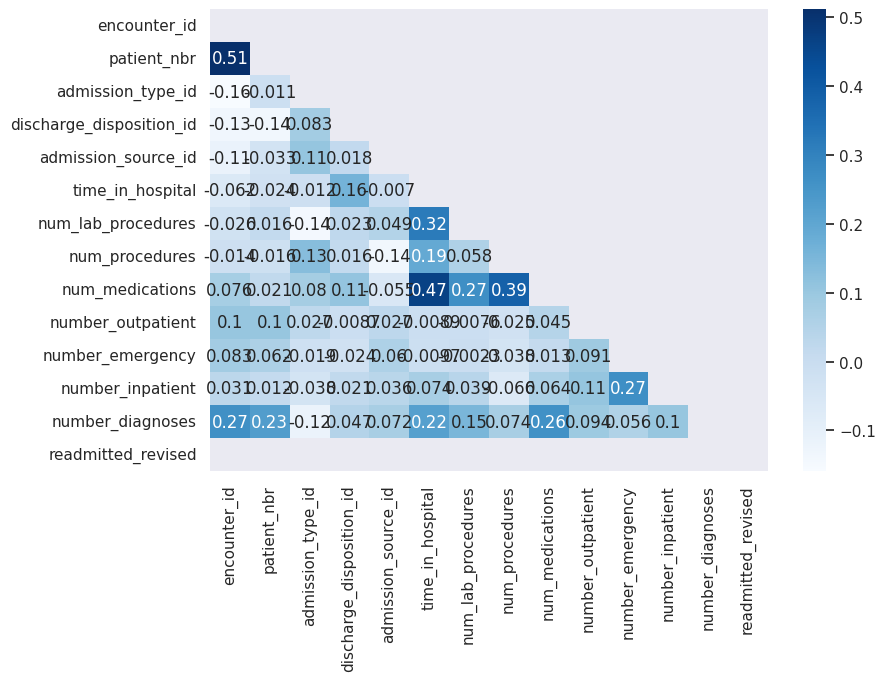

In [12]:
# Feature correlation
dataset['readmitted_revised'] = dataset.readmitted.map({'>30': 1, '<30': 1,'no': 0})
corr = dataset.corr()

# Plot correlation
fig = plt.figure(figsize=(9, 6))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='Blues', mask=mask)

plt.show()

## II. Data preparation

Since the original data contains incomplete, redundant, and noisy information. The methodology for the data preparation is described below.

#### 1. Removing columns with an unique value

In [13]:
for col in dataset.columns: 
    if len(dataset[col].unique()) == 1:
        dataset.drop(col,inplace=True,axis=1)
        
print('After removing the columns with an unique value, into the dataset remains', len(dataset.columns),'columns')

After removing the columns with an unique value, into the dataset remains 49 columns


#### 2. Duplicates

No duplicates by encounter identifier

In [14]:
dataset[dataset.duplicated(['encounter_id'])]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_revised


But checking at patient level, there is 30,248 records associated with duplicate records. Even when they correspond to different encounter (hospital admission) they are *not statistical independent*.

In [15]:
print( 'Unique records:',len(dataset.patient_nbr.unique()) ,'\nDuplicates: ', len(dataset.patient_nbr)-len(dataset.patient_nbr.unique()))

Unique records: 71518 
Duplicates:  30248


Considering the first record into the dataset for the duplicate patients.

In [16]:
dataset.sort_values("patient_nbr", inplace=True) 
dataset.drop_duplicates(subset ="patient_nbr", keep = 'first', inplace = True) 

In [17]:
print('After removing duplicate there are ', len(dataset),  ' unique observations')

After removing duplicate there are  71518  unique observations


#### 3. Removing death and hospice people 

Removing people related to death or hospice since they will not have any chance to be readmitted

In [18]:
dataset=dataset[~dataset.discharge_disposition_id.isin([11,13,14,19,20,21])] #Found IDs_Mapping

#### 4. Missing Values

Checking the percentage missing rate by column

In [19]:
pd.set_option("display.max_rows", 100)
is_na=dataset.isna().sum().sort_values(ascending=False)
np.round(100*is_na/len(np.unique(dataset['encounter_id'])),2)

weight                      96.00
readmitted_revised          66.05
medical_specialty           48.02
payer_code                  42.84
race                         2.70
diag_3                       1.70
diag_2                       0.43
diag_1                       0.02
troglitazone                 0.00
glipizide                    0.00
glyburide                    0.00
tolbutamide                  0.00
pioglitazone                 0.00
rosiglitazone                0.00
acarbose                     0.00
miglitol                     0.00
insulin                      0.00
tolazamide                   0.00
glimepiride                  0.00
glyburide-metformin          0.00
glipizide-metformin          0.00
glimepiride-pioglitazone     0.00
metformin-rosiglitazone      0.00
metformin-pioglitazone       0.00
change                       0.00
diabetesMed                  0.00
readmitted                   0.00
acetohexamide                0.00
encounter_id                 0.00
chlorpropamide

Weight, Medical speciality and  Payer code will be removed, since they had a high percentage of missing values.

In [20]:
most_missing_cols = dataset.columns[dataset.isnull().mean() > 0.40]
most_missing_cols =most_missing_cols.to_list() 
dataset=dataset.drop(most_missing_cols, axis=1)

The observations with any missing values, nulls or no mapping attributes will be removed as well.

In [21]:
dataset=dataset.dropna() 
dataset=dataset[~((dataset.admission_type_id.isin([5,6,8])) | (dataset.discharge_disposition_id.isin([18,25,26])) | (dataset.admission_source_id.isin([9,15,17,20,21] )))]  ##Removing nulls, not available or not mapped 

print( 'After removing the null values remain', dataset.shape[0], 'patients') 

After removing the null values remain 56196 patients


#### 5. Recategorization

In [22]:
def barchart_horizontal(column, labels, title, plot_name,a,b):
    feq=dataset.pivot_table(index=column, values='encounter_id', aggfunc='count')
    feq['Type']=labels
    feq.set_index('Type', inplace=True)
    feq=feq.sort_values(by='encounter_id', ascending=True)
    feq.plot.barh(figsize=(a,b),  width= 1)
    plt.xlabel('Number of patients', fontsize = 11)
    plt.ylabel('')
    plt.legend().set_visible(False)
    return plt.show()

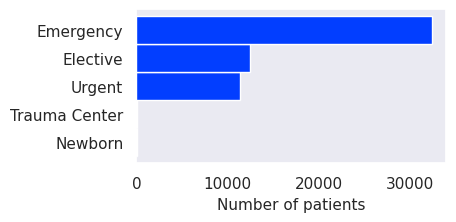

In [23]:
Admission_type=['Emergency','Urgent','Elective','Newborn','Trauma Center']
barchart_horizontal('admission_type_id', Admission_type, 'Admission Type Distribution', 'Admission_type.png',4,2)

The admission type will be reduced to just two categories: Emergency and No emergency, where 1 is associated with No emergency

In [24]:
dataset['admission_type'] = dataset['admission_type_id'].apply(lambda x: 1 if x > 1 else 0) #Checking ID_Mapping: 1= No Emergency
dataset.pivot_table(index='admission_type', values='admission_type_id', aggfunc='count')

,admission_type_id
admission_type,
0,32382
1,23814


- Discharge Disposition

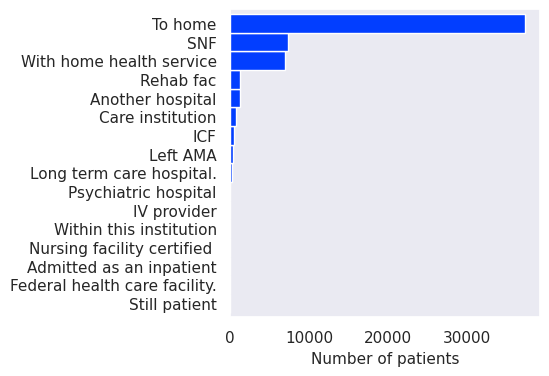

In [25]:
dispositions=['To home',
'Another hospital',
'SNF',
'ICF',
'Care institution',
'With home health service',
'Left AMA',
'IV provider',
'Admitted as an inpatient',
'Still patient',
'Within this institution',
'Rehab fac',
'Long term care hospital.',
'Nursing facility certified ',
'Federal health care facility.',
'Psychiatric hospital'
]

barchart_horizontal('discharge_disposition_id', dispositions,'Discharge Disposition Distribution', 'Discharge_Disposition.png',4,4)

Discharged disposition will be reduced to just two categories: Discharged to home and Not discharge to home, having not discharge to home=1

In [26]:
dataset['Discharged_type'] = dataset['discharge_disposition_id'].apply(lambda x: 1 if x > 1 else 0) ##Checking ID_Mapping: 0= Discharged to home
dataset.pivot_table(index='Discharged_type', values='encounter_id', aggfunc='count')

,encounter_id
Discharged_type,
0,37366
1,18830


- Admission Source

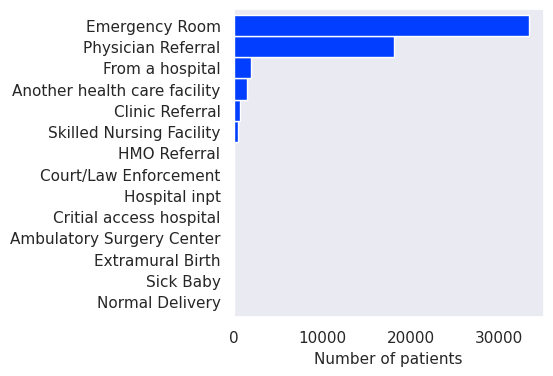

In [28]:
admission_source=[
'Physician Referral',
'Clinic Referral',
'HMO Referral',
'From a hospital',
'Skilled Nursing Facility',
'Another health care facility',
'Emergency Room',
'Court/Law Enforcement',
'Critial access hospital',
'Normal Delivery',
'Sick Baby',
'Extramural Birth',
'Hospital inpt',
'Ambulatory Surgery Center']
barchart_horizontal('admission_source_id', admission_source,'Admission Source Distribution', 'Admission_source.png',4,4)


The admission type will be reduced to just two categories: Emergency room and No emergency room, where Emergency room =1

In [29]:
dataset['Admision_source'] = dataset['admission_source_id'].apply(lambda x: 1 if x==7 else 0) ##Emergency Room=1

Dropping the original columns associated with admission type, discharge disposition and admission source

In [30]:
dataset=dataset.drop(['admission_type_id', 'discharge_disposition_id', 'admission_source_id'], axis=1) 

#### 6. Checking the distribution of other categorical attributes

Let's see the distribution of the general medication prescribed, the change in diabetic medications and if the patient was readdmited.

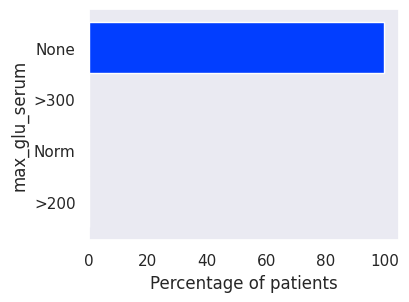

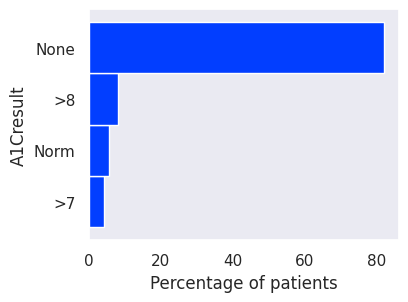

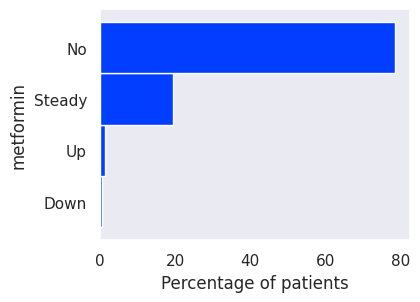

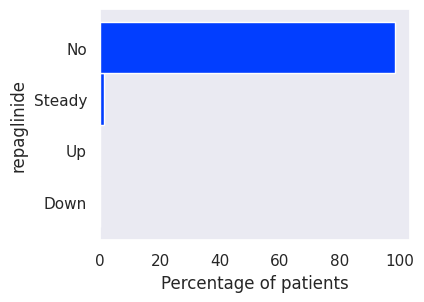

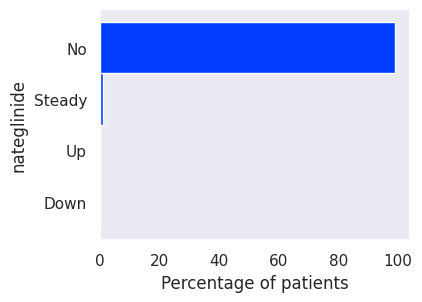

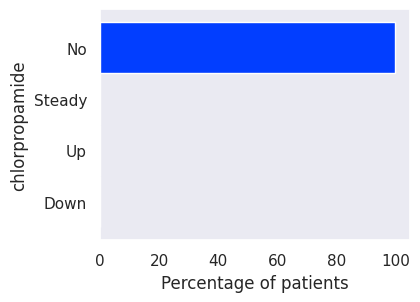

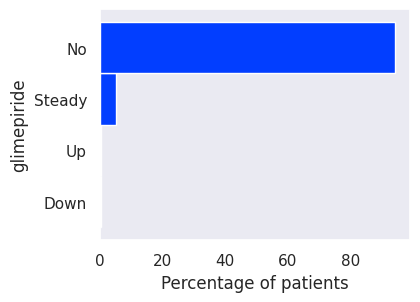

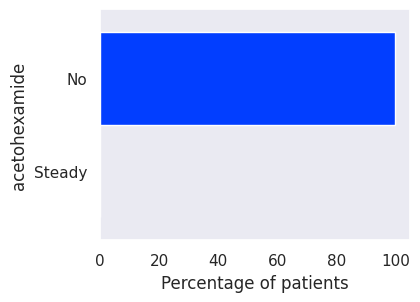

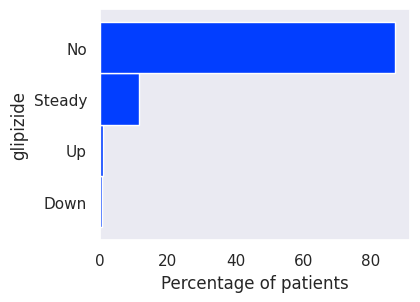

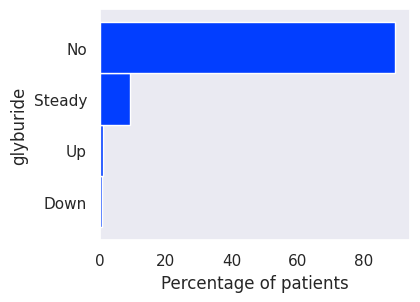

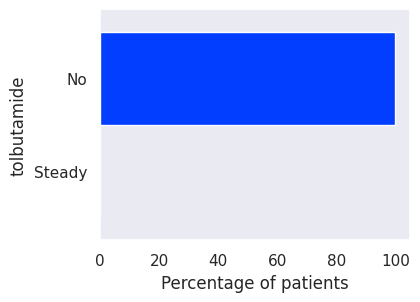

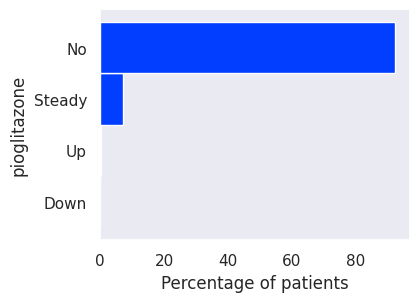

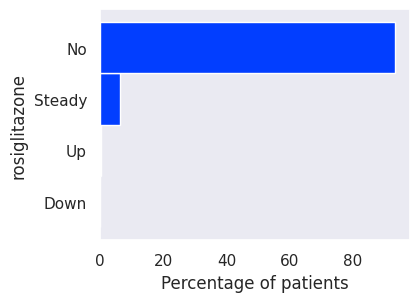

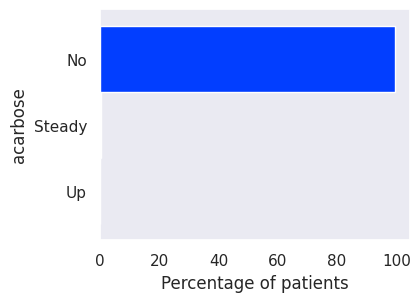

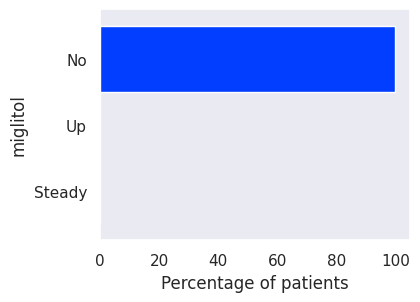

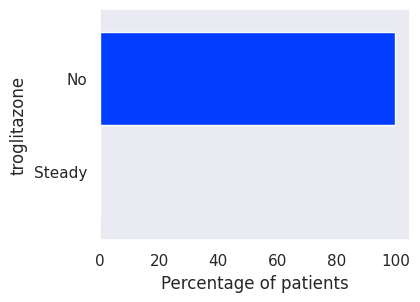

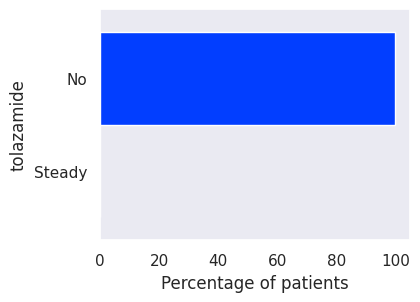

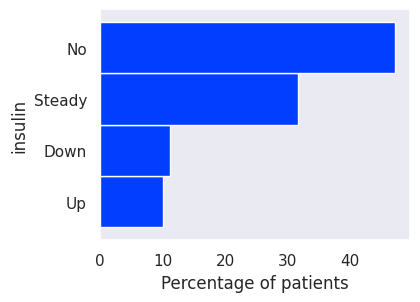

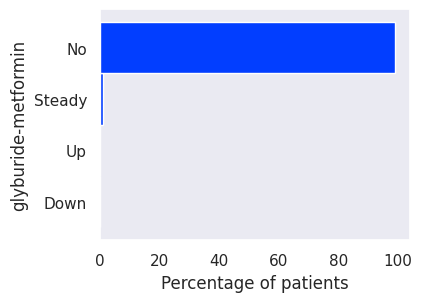

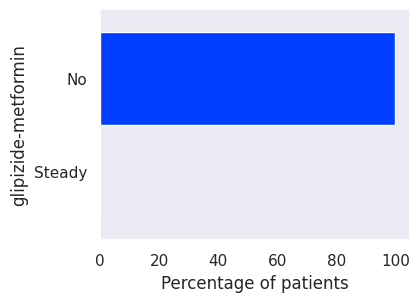

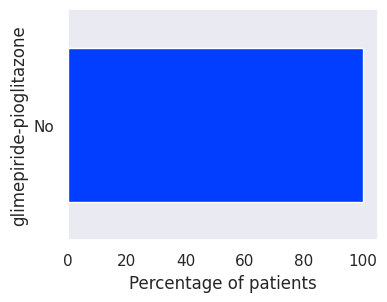

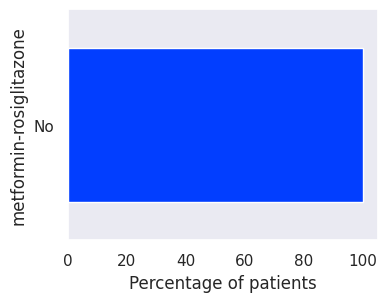

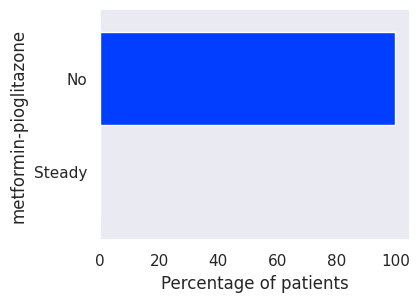

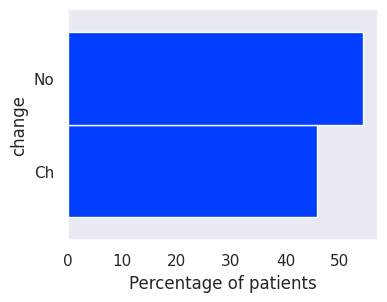

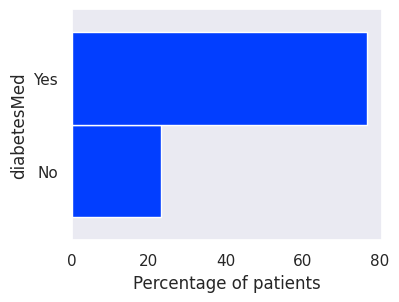

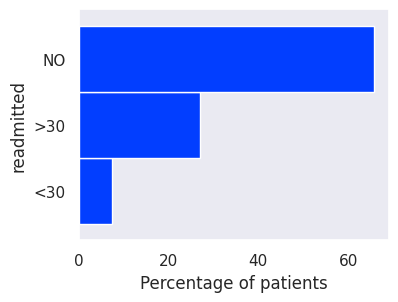

In [31]:
medical=['max_glu_serum','A1Cresult','metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
        'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide','pioglitazone', 
        'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone','tolazamide', 'insulin', 
        'glyburide-metformin', 'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted' ]
for var in medical:
    
    pivot = dataset.pivot_table(index=[var], values=['encounter_id'], aggfunc='count', margins=False)
    pivot0=pivot.reset_index()
    pivot0['percentage']= np.round(100* (pivot0['encounter_id']/pivot0['encounter_id'].sum()),1)

    feq = pivot0[[var, 'percentage']].sort_values('percentage')
    feq=feq.set_index(var)
    feq.plot.barh(figsize=(4,3),  width= 1)
    plt.xlabel('Percentage of patients', fontsize = 12)
    plt.ylabel(var, fontsize = 12)
    plt.legend().set_visible(False)
    plt.show()

The columns below will be removed since the majority of their values are associated with an unique class.

In [32]:
no_distr=['max_glu_serum','repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide','glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone' ]
dataset=dataset.drop(no_distr, axis=1)

In [33]:
print('After all of these changes in the columns, into the dataset remains ', len(dataset.columns), 'attributes')

After all of these changes in the columns, into the dataset remains  27 attributes


##### Checking the demographics and the output

In [34]:
def category_count_plot(df,col, figsize=(5,3)):
    plt.figure(figsize=figsize)
    df[col].value_counts().plot(kind='bar')
    plt.xticks(rotation=0)
    plt.ylabel('Number of patients')
    plt.show()

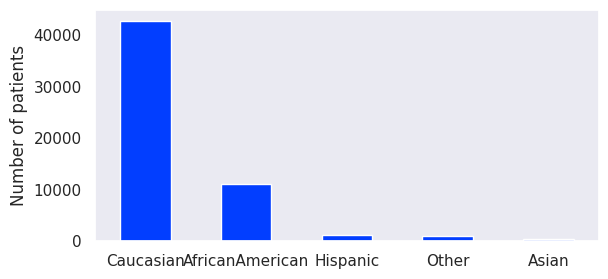

Caucasian          76.1
AfricanAmerican    19.5
Hispanic            2.0
Other               1.7
Asian               0.7
Name: race, dtype: float64


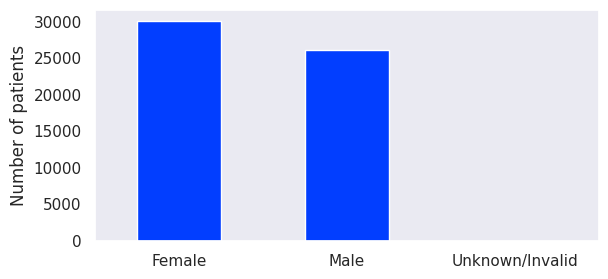

Female             53.5
Male               46.5
Unknown/Invalid     0.0
Name: gender, dtype: float64


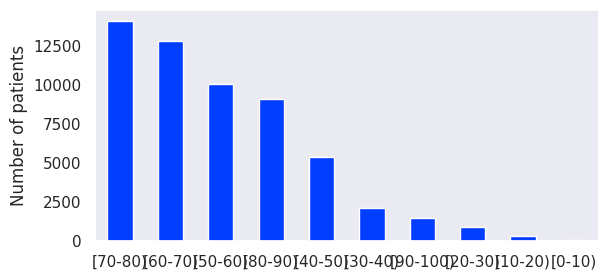

[70-80)     25.0
[60-70)     22.7
[50-60)     17.9
[80-90)     16.2
[40-50)      9.5
[30-40)      3.8
[90-100)     2.6
[20-30)      1.6
[10-20)      0.6
[0-10)       0.1
Name: age, dtype: float64


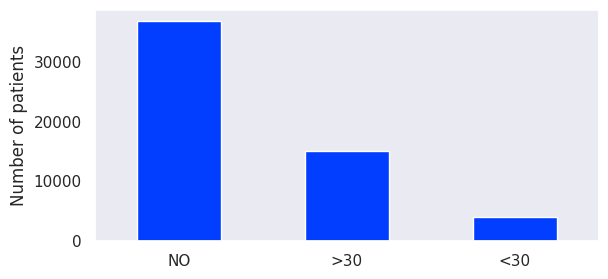

NO     65.8
>30    26.9
<30     7.3
Name: readmitted, dtype: float64


In [35]:
demographics=['race','gender', 'age', 'readmitted']
for col in demographics:
    category_count_plot(dataset,col, figsize=(6.5,3))
    print(round(dataset[col].value_counts(normalize=True)*100,1))

#### 7. Removing the Unknown gender

Just keeping in gender: Female and Male. One record was deleted associated with Unknown/Invalid

In [36]:
dataset=dataset[dataset['gender'].isin(['Female', 'Male' ])]

#### 8. Categories for ages

New categories for age are created to have a more even distribution within classes.

In [37]:
dataset.loc[dataset.age.str.contains('10|20|30'), 'age']='Less_fourty' 
dataset.loc[dataset.age.str.contains('40|50'), 'age']='Between_fourty_sixty'
dataset.loc[dataset.age.str.contains('60'), 'age']='Between_sixty_seventy'
dataset.loc[dataset.age.str.contains('70|80|90'), 'age']='Greater_seventy'

In [38]:
dataset.pivot_table(index='age', values='encounter_id', aggfunc='count')

,encounter_id
age,
Between_fourty_sixty,15395
Between_sixty_seventy,12783
Greater_seventy,23159
Less_fourty,4858


#### 9. Categories for Readmitted

Let's see the original distribution for Readmitted.

In [39]:
func = lambda x: round(100*x.count()/dataset.shape[0],1)
readmitted_distribution=dataset.pivot_table(index='readmitted', values='encounter_id', aggfunc=func, margins=True)
readmitted_distribution.columns=['% Total']
readmitted_distribution

,% Total
readmitted,
<30,7.3
>30,26.9
NO,65.8
All,100.0


Since the readmission in more than 30 days could be related to the state of the patient and not properly related to the previous treatment, I would like to categorize them in the same group with No readmission. Then the new categorization for the outcoume is 1 related with a readmission in less than 30 days and 0 in other case. 

In [40]:
dataset['readmitted'] = dataset['readmitted'].replace('>30', 0)
dataset['readmitted'] = dataset['readmitted'].replace('<30', 1)
dataset['readmitted'] = dataset['readmitted'].replace('NO', 0)

readmitted_distribution=dataset.pivot_table(index='readmitted', values='encounter_id', aggfunc=func, margins=True)
readmitted_distribution.columns=['% Total']
readmitted_distribution

,% Total
readmitted,
0,92.7
1,7.3
All,100.0


Only 7.3% of the dataset is related with patients who were readmitted in less than 30 days after of the hospitalization. Moving forward with the binary models this could be a problem since most of the machine learning algorithms needs a similar proportion into the classes. 

In [41]:
# Filtering diag_1 equal diabetes
df_diag_1 = dataset[dataset['diag_1'].str.startswith('250.')]

# Table readmission rate by diag_1 equal diabetes
table_1 = (df_diag_1['readmitted']
           .value_counts(normalize=True)
           .mul(100)
           .round()
           .reset_index(name='readmission rate (%)')
           .rename(columns={'index': 'readmitted'})
           )

table_1

,readmitted,readmission rate (%)
0,0,92.0
1,1,8.0


In [42]:
# Filtering diag_2 equal diabetes
df_diag_2 = dataset[dataset['diag_2'].str.startswith('250.')]

# Table readmission rate by diag_2 equal diabetes
table_2 = (df_diag_2['readmitted']
           .value_counts(normalize=True)
           .mul(100).round()
           .reset_index(name='readmission rate (%)')
           .rename(columns={'index': 'readmitted'})
           )

table_2

,readmitted,readmission rate (%)
0,0,92.0
1,1,8.0


In [43]:
# Filtering diag_1 equal diabetes
df_diag_3 = dataset[dataset['diag_3'].str.startswith('250.')]

# Table readmission rate by diag_3 equal diabetes
table_3 = (df_diag_3['readmitted']
           .value_counts(normalize=True)
           .mul(100)
           .round()
           .reset_index(name='readmission rate (%)')
           .rename(columns={'index': 'readmitted'})
           )

table_3

,readmitted,readmission rate (%)
0,0,90.0
1,1,10.0


In [44]:
# Filtering df different by 'Diabetes'
other_diag = dataset[dataset.apply(lambda x: '250.*' not in x.values, axis=1)]

# Df other diagnosis
other_diag = (other_diag[['readmitted', 'diag_1', 'diag_2', 'diag_3']]
              .melt(id_vars='readmitted', var_name='diag', value_name='diseases')
              .drop('diag', axis=1)
              )

# Table readmission rate for each of the other diagnoses.
other_readmission = (other_diag.
                     groupby('diseases')
                     .value_counts(normalize=True)
                     .mul(100)
                     .round()
                     .reset_index(name='readmission rate (%)')
                     )

other_readmission = other_readmission[other_readmission['diseases'] != 'Missing']

# Table readmission by other diagnosis
toal_other_readmission = (other_readmission
                          .groupby('readmitted')['readmission rate (%)']
                          .mean()
                          .reset_index(name='readmission rate (%)')
                          )

toal_other_readmission

,readmitted,readmission rate (%)
0,0,94.457509
1,1,11.482759


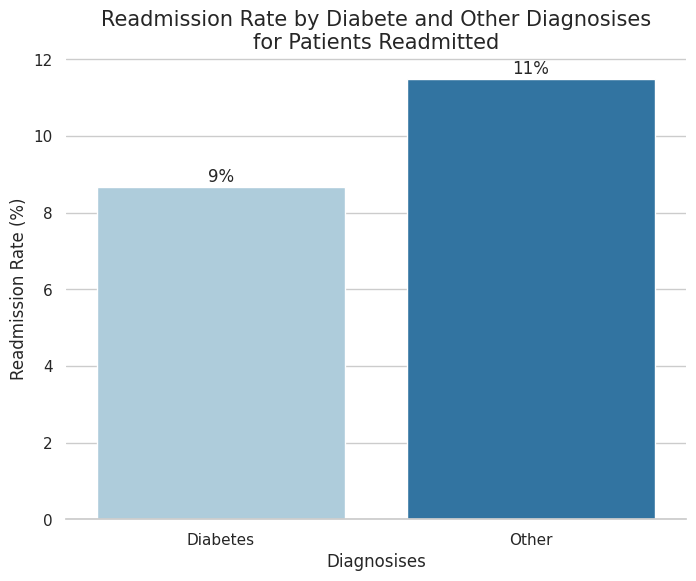

In [45]:
# Concat  table_1, table_2, table_3
diabetes_diag = pd.concat([table_1, table_2, table_3])

# Table diabetes_diag
diabetes_diag = pd.DataFrame(diabetes_diag
                             .groupby('readmitted')['readmission rate (%)']
                             .mean()
                             .reset_index()
                             )

# Table diabetes_other_diag
diabetes_other_diag = pd.concat([diabetes_diag, toal_other_readmission])

# Filtering for readmitted = yes
diabetes_other_diag = diabetes_other_diag[diabetes_other_diag['readmitted'] == 1]


diabetes_other_diag['diagnosis'] = ['Diabetes', 'Other']

# Sorting columns
diabetes_other_diag = diabetes_other_diag.reindex(columns=['diagnosis', 'readmitted', 'readmission rate (%)'])

diabetes_other_diag

# Plot Readmission Rate by Diabete and Other Diagnosises
sns.set_style('whitegrid')
sns.set_palette('Paired')
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x='diagnosis', y='readmission rate (%)', data=diabetes_other_diag)

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f"{height:.0f}%", xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 1), textcoords='offset points',
                ha='center', va='bottom', fontsize=12)

sns.despine(left=True)
plt.title('Readmission Rate by Diabete and Other Diagnosises\nfor Patients Readmitted', fontsize=15)
plt.xlabel('Diagnosises', fontsize=12)
plt.ylabel('Readmission Rate (%)', fontsize=12)
plt.show()

In [46]:
dataset.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'A1Cresult', 'metformin', 'glipizide', 'glyburide', 'insulin', 'change',
       'diabetesMed', 'readmitted', 'admission_type', 'Discharged_type',
       'Admision_source'],
      dtype='object')

In [47]:
############### Chi-squared test ###############
# Set the p-value threshold to 0.05
alpha = 0.05

# Create a new column 'has_diabetes' indicating whether the primary diagnosis is diabetes
dataset['has_diabetes'] = dataset.diag_1.str.contains('250.*')

# Perform a chi-squared independence test between 'has_diabetes' and 'readmitted' and obtain the p-value
expected, observed, stats = pg.chi2_independence(data=dataset, y='has_diabetes', x='readmitted', correction=False)

dataset.drop('has_diabetes', axis=1, inplace=True)

print(
    '---------------------------------------    Results Chi-squared test    ---------------------------------------\n')
print(f'The p_value is: {stats.pval.max()} \nIs p_value less than alpha?: {stats.pval.max() < alpha}')

##Other table


# Table readmission vs AC1 test
table_5 = (dataset
           .groupby('A1Cresult')['readmitted']
           .value_counts(normalize=True)
           .mul(100)
           .round()
           .reset_index(name='readmission rate (%)')
           )

table_5

# Table Readmission vs diabetes medication
table_6 = (dataset
           .groupby('diabetesMed')['readmitted']
           .value_counts(normalize=True)
           .mul(100)
           .round()
           .reset_index(name='readmission rate (%)')
           )

table_6

# Table readmission vs change medication
table_7 = (dataset
           .groupby('change')['readmitted']
           .value_counts(normalize=True)
           .mul(100)
           .round()
           .reset_index(name='readmission rate (%)')
           )

table_7

# Table readmission vs time in hospital
table_8 = (dataset
           .groupby('time_in_hospital')['readmitted']
           .value_counts(normalize=True)
           .mul(100)
           .round()
           .reset_index(name='readmission rate (%)')
           )

table_8

---------------------------------------    Results Chi-squared test    ---------------------------------------

The p_value is: 0.24141432873150667 
Is p_value less than alpha?: False


,time_in_hospital,readmitted,readmission rate (%)
0,1,0,95.0
1,1,1,5.0
2,2,0,94.0
3,2,1,6.0
4,3,0,93.0
5,3,1,7.0
6,4,0,93.0
7,4,1,7.0
8,5,0,92.0
9,5,1,8.0


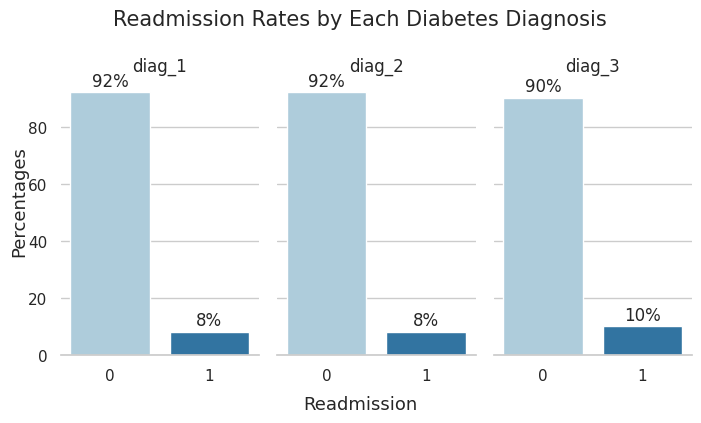

In [48]:
# Plot Readmission Rates by Each Diabetes Diagnosis
sns.set_style('whitegrid')
sns.set_palette('Paired')

fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(7, 4))

for i, table in enumerate([table_1, table_2, table_3]):
    ax = axes[i]
    sns.barplot(x='readmitted', y='readmission rate (%)', data=table.sort_values('readmitted'), ax=ax)
    ax.set_title(f'diag_{i + 1}')
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Annotate bar plot with percentage values
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f"{height:.0f}%", xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 2), textcoords='offset points',
                    ha='center', va='bottom', fontsize=12)

fig.suptitle("Readmission Rates by Each Diabetes Diagnosis", fontsize=15)
fig.text(0.5, -0.02, 'Readmission', ha='center', fontsize=13)
fig.text(0, 0.5, 'Percentages', va='center', fontsize=13, rotation=90)
plt.tight_layout()
sns.despine(left=True)

plt.show()

Checking the readmitted distribution between the quantitative variables: The number_inpatient tends to be higher for the readmitted in contrast with those patients with more procedures or those with higher number outpatients who present less ratio of readmitted.

In [49]:
# quant_col=dataset[['readmitted','time_in_hospital', 'num_lab_procedures', 'num_procedures','num_medications', 'number_outpatient', 'number_emergency',
#        'number_inpatient', 'number_diagnoses']]

# sns.pairplot(quant_col, hue="readmitted")
# plt.savefig('pair_plot.png')

In [50]:
dataset.head()

,encounter_id,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,metformin,glipizide,glyburide,insulin,change,diabetesMed,readmitted,admission_type,Discharged_type,Admision_source
4267,24437208,135,Caucasian,Female,Between_fourty_sixty,8,77,6,33,0,...,Steady,No,Down,Steady,Ch,Yes,1,1,0,0
5827,29758806,378,Caucasian,Female,Between_fourty_sixty,2,49,1,11,0,...,No,No,No,No,No,No,0,1,0,0
67608,189899286,729,Caucasian,Female,Greater_seventy,4,68,2,23,0,...,Steady,No,No,No,No,Yes,0,0,1,1
17494,64331490,774,Caucasian,Female,Greater_seventy,3,46,0,20,0,...,Steady,No,Steady,No,Ch,Yes,0,0,0,1
2270,14824206,927,AfricanAmerican,Female,Less_fourty,5,49,0,5,0,...,No,No,No,No,No,Yes,0,0,0,1


In [51]:
dataset['A1Cresult']=dataset['A1Cresult'].str.replace('>', '')

#### 10. Categories for Primary Diagnosis

Values of the primary diagnosis were aggregated in 9 specialities. Following the groups presented in a research [article](https://www.hindawi.com/journals/bmri/2014/781670/tab2/) 

In [52]:
dataset.loc[dataset['diag_1'].str.contains('V'), 'diag_1'] = '1'
dataset.loc[dataset['diag_1'].str.contains('E'), 'diag_1'] = '1'
dataset['diag_1']=dataset['diag_1'].astype(float)
dataset['diag_type'] = dataset['diag_1'].apply(lambda x: 'Diabetes' if x==250 
                                               else 'Other' if x==1 
                                               else 'Circulatory' if x>=390 and x<=459 or x==785
                                               else 'Respiratory' if x>=460 and x<=519 or x==786
                                               else 'Digestive' if x>=520 and x<=579 or x==787
                                               else 'Genitourinary' if x>=580 and x<=629 or x==788
                                               else 'Neoplasms' if x>=140 and x<=239 
                                               else 'Musculoskeletal' if x>=710 and x<=739 
                                               else 'Injury' if x>=800 and x<=999
                                               else 'Other')

pd.set_option("display.max_rows", 700)
dataset.pivot_table(index=['diag_type'], values='encounter_id', aggfunc='count')

,encounter_id
diag_type,
Circulatory,17116
Diabetes,149
Digestive,5246
Genitourinary,2896
Injury,3943
Musculoskeletal,3115
Neoplasms,2046
Other,14145
Respiratory,7539


In [53]:
# Ranking table diagnosis by age group
age_group = dataset.groupby(['age', 'diag_type']).size().reset_index(name='counts')

pivot_table = pd.pivot_table(age_group,index='diag_type',columns='age',
                             values='counts').rank(ascending=False, axis=0)

def color_rank_one(val):
    '''This function applies the orange background color to the first rank'''
    if val == 1:
        return 'background-color: mediumturquoise'
    else:
        return ''


pivot_table.style.format('{:,.0f}').background_gradient(cmap='Blues_r', axis=0).applymap(color_rank_one)

age,Between_fourty_sixty,Between_sixty_seventy,Greater_seventy,Less_fourty
diag_type,,,,
Circulatory,2,1,1,2
Diabetes,9,9,9,9
Digestive,4,4,4,4
Genitourinary,7,8,6,6
Injury,5,6,5,5
Musculoskeletal,6,5,7,7
Neoplasms,8,7,8,8
Other,1,2,2,1
Respiratory,3,3,3,3


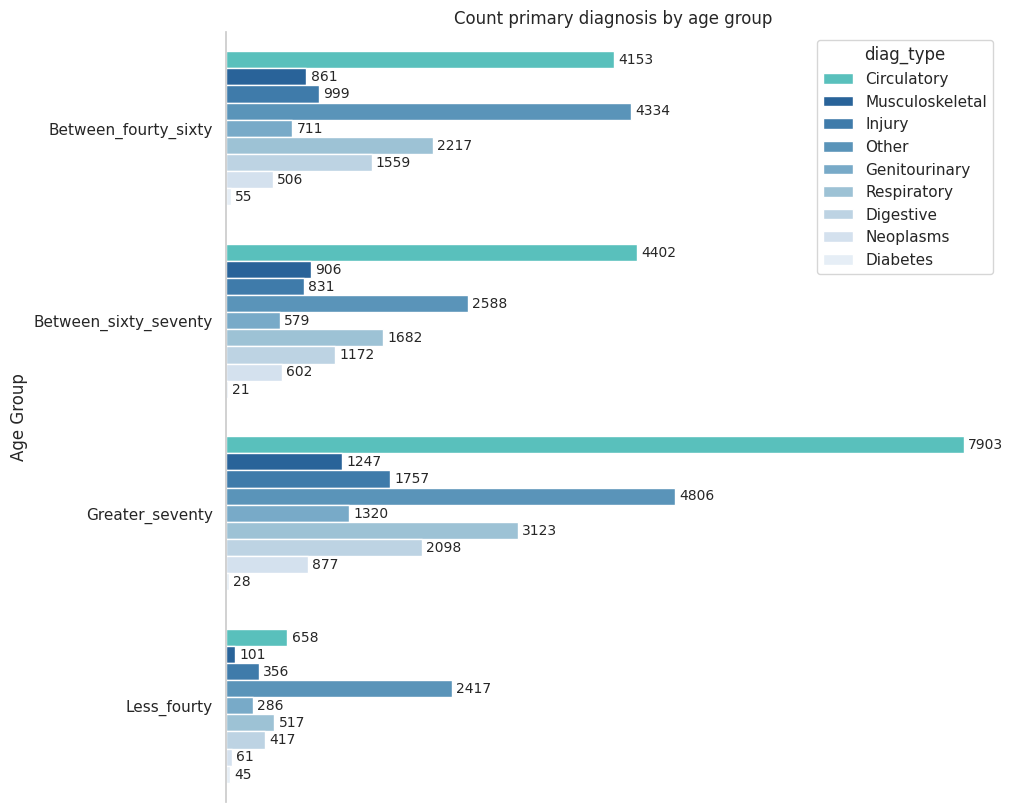

In [54]:
# Plot diagnosis by age group
fig, ax = plt.subplots(figsize=(10, 10))
sns.set_style('white')

diagnosis = dataset[dataset['diag_type'] != 'Missing']
unique_diags = diagnosis.diag_type.unique()

blues = sns.color_palette('Blues', n_colors=len(unique_diags))
custom_palette = ["mediumturquoise" if diag == "Circulatory"
                  else blues[len(unique_diags) - 1 - i]
                  for i, diag in enumerate(unique_diags)]

sns.countplot(y='age',
              hue='diag_type',
              order=diagnosis.age.sort_values().unique(),
              palette=custom_palette,
              data=diagnosis
              )

for bar in ax.patches:
    width = bar.get_width()
    x = width
    y = bar.get_y() + bar.get_height() / 2
    label = f"{width:.0f}"
    ax.annotate(label, (x, y),
                ha='left', va='center',
                xytext=(3, 0), fontsize=10,
                textcoords='offset points'
                )

sns.despine(bottom=True)
plt.ylabel('Age Group', fontsize=12)
plt.xlabel('')
plt.xticks([])
plt.title('Count primary diagnosis by age group')

plt.show()


#### 11. One hot Encoding

In [55]:
categories_to_revise= ['diabetesMed', 'change', 'insulin', 'A1Cresult', 'metformin', 'glipizide', 'glyburide']
for var in categories_to_revise:
    print(var, dataset[var].unique()) 

diabetesMed ['Yes' 'No']
change ['Ch' 'No']
insulin ['Steady' 'No' 'Down' 'Up']
A1Cresult ['None' '7' '8' 'Norm']
metformin ['Steady' 'No' 'Down' 'Up']
glipizide ['No' 'Up' 'Steady' 'Down']
glyburide ['Down' 'No' 'Steady' 'Up']


In [56]:
for var in ['diabetesMed']:
    dataset.loc[dataset[var].str.contains('Yes'), var] = '1'
    dataset.loc[dataset[var].str.contains('No'), var] = '0'
    dataset[var]=dataset[var].astype('int64')

In [57]:
dataset.loc[dataset['change'].str.contains('Ch'), 'change'] = '1' 
dataset.loc[dataset['change'].str.contains('No'), 'change'] = '0'
dataset['change']=dataset['change'].astype('int64')

In [58]:
dummies_creation=['race','gender','insulin','age', 'A1Cresult', 'diag_type','metformin', 'glipizide', 'glyburide']
for var in dummies_creation:
    dataset=pd.concat([dataset, pd.get_dummies(dataset[var], prefix=var)], axis=1) 

In [59]:
dataset.head()

,encounter_id,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,metformin_Steady,metformin_Up,glipizide_Down,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up
4267,24437208,135,Caucasian,Female,Between_fourty_sixty,8,77,6,33,0,...,1,0,0,1,0,0,1,0,0,0
5827,29758806,378,Caucasian,Female,Between_fourty_sixty,2,49,1,11,0,...,0,0,0,1,0,0,0,1,0,0
67608,189899286,729,Caucasian,Female,Greater_seventy,4,68,2,23,0,...,1,0,0,1,0,0,0,1,0,0
17494,64331490,774,Caucasian,Female,Greater_seventy,3,46,0,20,0,...,1,0,0,1,0,0,0,0,1,0
2270,14824206,927,AfricanAmerican,Female,Less_fourty,5,49,0,5,0,...,0,0,0,1,0,0,0,1,0,0


In [60]:
dataset=dataset.drop(dummies_creation+['diag_1', 'diag_2', 'diag_3'], axis=1)

In [61]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
    display(dataset)

,encounter_id,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,admission_type,Discharged_type,Admision_source,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,insulin_Down,insulin_No,insulin_Steady,insulin_Up,age_Between_fourty_sixty,age_Between_sixty_seventy,age_Greater_seventy,age_Less_fourty,A1Cresult_7,A1Cresult_8,A1Cresult_None,A1Cresult_Norm,diag_type_Circulatory,diag_type_Diabetes,diag_type_Digestive,diag_type_Genitourinary,diag_type_Injury,diag_type_Musculoskeletal,diag_type_Neoplasms,diag_type_Other,diag_type_Respiratory,metformin_Down,metformin_No,metformin_Steady,metformin_Up,glipizide_Down,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up
4267,24437208,135,8,77,6,33,0,0,0,8,1,1,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
5827,29758806,378,2,49,1,11,0,0,0,3,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101748,443811536,189481478,14,69,0,16,0,0,0,5,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
96147,371459060,189502619,5,35,4,23,0,0,0,8,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


After all the data wrangling the final dataset contains 56,195 records and 56 attributes, having the readmission status as the outcome. This dataset consists of hospital admissions that did not result in a patient death or discharge to a hospice. Each encounter corresponds to a unique patient diagnosed with diabetes, although the primary diagnosis may be different. 

In [63]:
dataset.to_csv('Clean_Readmitted_May2023.csv')

In [64]:
# # correlation heatmap
# mask = np.triu(np.ones_like(corr, dtype=bool))
# sns.heatmap(corr, annot=True, cmap='Blues', mask=mask, ax=axes[4, 0])

# plt.subplots_adjust(hspace=0.4, wspace=0.18)
# plt.title('Correlation heatmap', fontsize=15)

# plt.show()

In [65]:
dataset.columns

Index(['encounter_id', 'patient_nbr', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses', 'change',
       'diabetesMed', 'readmitted', 'admission_type', 'Discharged_type',
       'Admision_source', 'race_AfricanAmerican', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_Female',
       'gender_Male', 'insulin_Down', 'insulin_No', 'insulin_Steady',
       'insulin_Up', 'age_Between_fourty_sixty', 'age_Between_sixty_seventy',
       'age_Greater_seventy', 'age_Less_fourty', 'A1Cresult_7', 'A1Cresult_8',
       'A1Cresult_None', 'A1Cresult_Norm', 'diag_type_Circulatory',
       'diag_type_Diabetes', 'diag_type_Digestive', 'diag_type_Genitourinary',
       'diag_type_Injury', 'diag_type_Musculoskeletal', 'diag_type_Neoplasms',
       'diag_type_Other', 'diag_type_Respiratory', 'metformin_Down',
       'metformin_No', 'metformin_Steady', 'me

### III. Loading the final dataset

In [68]:
time_start = time.time()

In [70]:
dataset=pd.read_csv('Clean_Readmitted_May2023.csv')
print('The input contains', dataset.shape[0], 'rows and ' , dataset.shape[1], 'columns')

The input contains 56195 rows and  57 columns


In [71]:
dataset.head(n=3).T

,0,1,2
Unnamed: 0,4267,5827,67608
encounter_id,24437208,29758806,189899286
patient_nbr,135,378,729
time_in_hospital,8,2,4
num_lab_procedures,77,49,68
num_procedures,6,1,2
num_medications,33,11,23
number_outpatient,0,0,0
number_emergency,0,0,0
number_inpatient,0,0,0


## IV. Model Performance

Since the readmission correspond to a binary classification. I am going to use the following metrics to compare the performance across the models:

- Confussion Matrix
- Precision 
- Recall 
- F_1 Score

In [72]:
def model_performance(model_prediction):
    cfm = confusion_matrix(y_test, model_prediction)

    true_negative = cfm[0][0]
    false_positive = cfm[0][1]
    false_negative = cfm[1][0]
    true_positive = cfm[1][1]

    Precision=round(precision_score(y_test, model_prediction),3)
    Recall=round(recall_score(y_test, model_prediction),3)
    F_1=round(f1_score(y_test, model_prediction),3)
    
    print('Confusion Matrix: \n', cfm, '\n')

    print('True Negative:', true_negative)
    print('False Positive:', false_positive)
    print('False Negative:', false_negative)
    print('True Positive:', true_positive,'\n')
    
    print ('Precision: {}'.format(Precision) )
    print ('Recall: {}'.format(Recall))
    print ('F_1: {}'.format(F_1))

### V. Unbalanced dataset


In [73]:
func = lambda x: round(100*x.count()/dataset.shape[0],1)
readmitted_distribution=dataset.pivot_table(index='readmitted', values='encounter_id', aggfunc=func, margins=True)
readmitted_distribution.columns=['% Total']
readmitted_distribution

,% Total
readmitted,
0,92.7
1,7.3
All,100.0


The readmitted classes follow a unbalanced distribution since the majority of patients haven't been readmitted (92.7%).

Splitting into train and test sets

In [74]:
X=dataset.drop([ 'Unnamed: 0','encounter_id', 'patient_nbr', 'gender_Female','readmitted'] , axis=1)
y=dataset['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

print('Training samples: {}'.format(X_train.shape[0]))
print('Testing samples: {}'.format(X_test.shape[0]))
print('Number of features: {}'.format(X_train.shape[1]))
print('Training outcome distribution: {}'.format(np.bincount(y_train)))
print('Testing outcome distribution: {}'.format(np.bincount(y_test)))

Training samples: 44956
Testing samples: 11239
Number of features: 52
Training outcome distribution: [41689  3267]
Testing outcome distribution: [10422   817]


#### 1. Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=500,random_state=0)
classifier.fit(X_train, y_train)
logistic_prediction = classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
model_performance(logistic_prediction)

Confusion Matrix: 
 [[10416     6]
 [  814     3]] 

True Negative: 10416
False Positive: 6
False Negative: 814
True Positive: 3 

Precision: 0.333
Recall: 0.004
F_1: 0.007


This model is not capturing well, those readmitted patients. 

#### 2. Weighted Logistic Regression

In [77]:
counts = np.bincount(y)
weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]

In [78]:
classifier = LogisticRegression(max_iter=500,random_state=0,class_weight='balanced') 
classifier.fit(X_train, y_train)
weight_logistic_prediction = classifier.predict(X_test)

In [79]:
model_performance(weight_logistic_prediction)

Confusion Matrix: 
 [[6899 3523]
 [ 331  486]] 

True Negative: 6899
False Positive: 3523
False Negative: 331
True Positive: 486 

Precision: 0.121
Recall: 0.595
F_1: 0.201


The best fit was found under the option class_weight='balanced' but there is not a good generalization for admitted even when the metrics are better than in the previous model.

#### 3. Artificial Neural Network

This is an artificial neural network with three densely-connected layers and use a relu activation function for the hidden layers and a sigmoid activation function for the output layer, as it is being used for a classification task. The loss function will be binary crossentropy.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 52)]              0         
                                                                 
 activation (Activation)     (None, 52)                0         
                                                                 
 First_hidden_layer (Dense)  (None, 256)               13568     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 Second_hidden_layer (Dense)  (None, 256)              65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 Third_hidden_layer (Dense)  (None, 128)               32896 

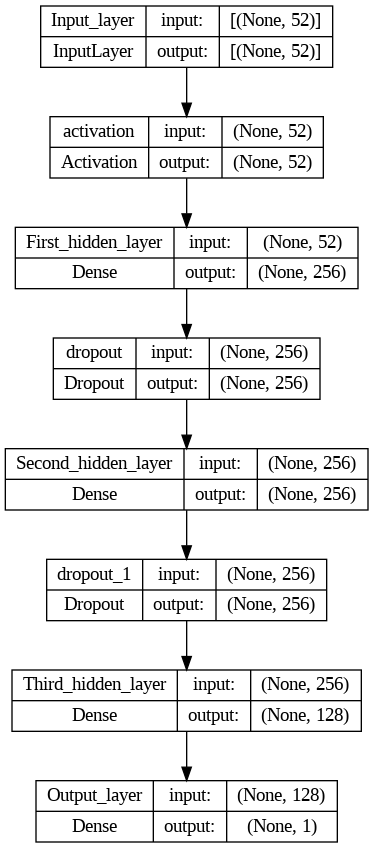

In [80]:
targets = y
targets = np.array(targets, dtype = 'uint8')

features = np.array(X,dtype = 'float32' )
num_val_samples = int(len(features) * 0.2)
train_features = features[:-num_val_samples]
train_targets = targets[:-num_val_samples]
val_features = features[-num_val_samples:]
val_targets = targets[-num_val_samples:]

scaler = StandardScaler()

scaler.fit(train_features)
train_features = scaler.transform(train_features)
val_features = scaler.transform(val_features )


counts = np.bincount(train_targets)
weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]

inputs = Input(shape=(train_features.shape[1],),name='Input_layer')


x = Activation('relu')(inputs)
x = Dense(256, activation='relu',name='First_hidden_layer')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu',name='Second_hidden_layer')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu',name='Third_hidden_layer')(x)
outputs = Dense(1, activation='sigmoid', name='Output_layer')(x)


model = Model(inputs=inputs, outputs=outputs)
model.summary()
plot_model(model, to_file='readmission_model.png', 
           show_shapes=True)

In [81]:
metrics = [
    FalseNegatives(name="fn"),
    FalsePositives(name="fp"),
    TrueNegatives(name="tn"),
    TruePositives(name="tp"),
    Precision(name="precision"),
    Recall(name="recall")]

model.compile(optimizer=Adam(0.0001), loss="binary_crossentropy", metrics=metrics)

In [82]:
callbacks = [callbacks.ModelCheckpoint("readmission_model_at_epoch_{epoch}.h5")]
class_weight = {0: weight_for_0, 1: weight_for_1}

history = model.fit(
    train_features,
    train_targets,
    batch_size=2048,
    epochs=100,
    verbose=2,
    callbacks=callbacks,
    validation_data=(val_features, val_targets),
    class_weight=class_weight,
) 

Epoch 1/100
22/22 - 8s - loss: 3.1600e-05 - fn: 893.0000 - fp: 30616.0000 - tn: 11097.0000 - tp: 2350.0000 - precision: 0.0713 - recall: 0.7246 - val_loss: 0.7542 - val_fn: 238.0000 - val_fp: 7996.0000 - val_tn: 2402.0000 - val_tp: 603.0000 - val_precision: 0.0701 - val_recall: 0.7170 - 8s/epoch - 352ms/step
Epoch 2/100
22/22 - 2s - loss: 3.1363e-05 - fn: 1098.0000 - fp: 27193.0000 - tn: 14520.0000 - tp: 2145.0000 - precision: 0.0731 - recall: 0.6614 - val_loss: 0.7249 - val_fn: 333.0000 - val_fp: 6617.0000 - val_tn: 3781.0000 - val_tp: 508.0000 - val_precision: 0.0713 - val_recall: 0.6040 - 2s/epoch - 81ms/step
Epoch 3/100
22/22 - 1s - loss: 3.1354e-05 - fn: 1356.0000 - fp: 24227.0000 - tn: 17486.0000 - tp: 1887.0000 - precision: 0.0723 - recall: 0.5819 - val_loss: 0.7073 - val_fn: 403.0000 - val_fp: 5563.0000 - val_tn: 4835.0000 - val_tp: 438.0000 - val_precision: 0.0730 - val_recall: 0.5208 - 1s/epoch - 66ms/step
Epoch 4/100
22/22 - 1s - loss: 3.1336e-05 - fn: 1453.0000 - fp: 22796.

In [83]:
y_pred_val = model.predict(val_features)
y_pred_val[y_pred_val > 0.5] = 1
y_pred_val[y_pred_val <=0.5] = 0
y_pred_val.reshape((y_pred_val.shape[0]))

y_pred_train = model.predict(train_features)
y_pred_train[y_pred_train > 0.5] = 1
y_pred_train[y_pred_train <=0.5] = 0
y_pred_train.reshape((y_pred_train.shape[0]))

1405/1405 [==============================] - 4s 3ms/step


array([0., 0., 1., ..., 0., 0., 0.], dtype=float32)

In [84]:
# Squeezing
val_targets = np.squeeze(val_targets)
y_pred_val = np.squeeze(y_pred_val)
train_targets = np.squeeze(train_targets)
y_pred_train = np.squeeze(y_pred_train)

# False Negative Testing
fn_val = FalseNegatives()
fn_val.update_state(val_targets, y_pred_val)
fn_val = fn_val.result().numpy()

# False Negative Training
fn_train = FalseNegatives()
fn_train.update_state(train_targets, y_pred_train)
fn_train = fn_train.result().numpy()

#False Positive Testing
fp_val = FalsePositives()
fp_val.update_state(val_targets, y_pred_val)
fp_val = fp_val.result().numpy()
#
#False Positive Training
fp_train = FalsePositives()
fp_train.update_state(train_targets, y_pred_train)
fp_train = fp_train.result().numpy()

# Precision validación
pre_val = Precision()
pre_val.update_state(val_targets, y_pred_val)
pre_val = pre_val.result().numpy()

# Precision training
pre_train = Precision()
pre_train.update_state(train_targets, y_pred_train)
pre_train = pre_train.result().numpy()
#
# recall testing
re_val = Recall()
re_val.update_state(val_targets, y_pred_val)
re_val = re_val.result().numpy()
#
# recall testing
re_train = Recall()
re_train.update_state(train_targets, y_pred_train)
re_train = re_train.result().numpy()
# 

#metrics
metrics = {'False_positive_training':fp_train, 'False_positive_testing':fp_val,
           '%False_positives': np.round((fp_train+fp_val)/ len(X_train)*100,1),
           'Falses_negatives_training':fn_train, 'False_negatives_testing':fn_val,
           '%False_negatives': np.round((fn_train+fn_val)/ len(X_train)*100,1),
           'Precision_train': np.round(pre_train,2), 'Precision_testing': np.round(pre_val,2),
           'Recall_train': np.round(re_train,2), 'Recall_testing':np.round(re_val,2),
            'F_1':np.round(2*(pre_val*re_val)/(pre_val+re_val), 2)}
metrics

{'False_positive_training': 14700.0,
 'False_positive_testing': 3944.0,
 '%False_positives': 41.5,
 'Falses_negatives_training': 1241.0,
 'False_negatives_testing': 344.0,
 '%False_negatives': 3.5,
 'Precision_train': 0.12,
 'Precision_testing': 0.11,
 'Recall_train': 0.62,
 'Recall_testing': 0.59,
 'F_1': 0.19}

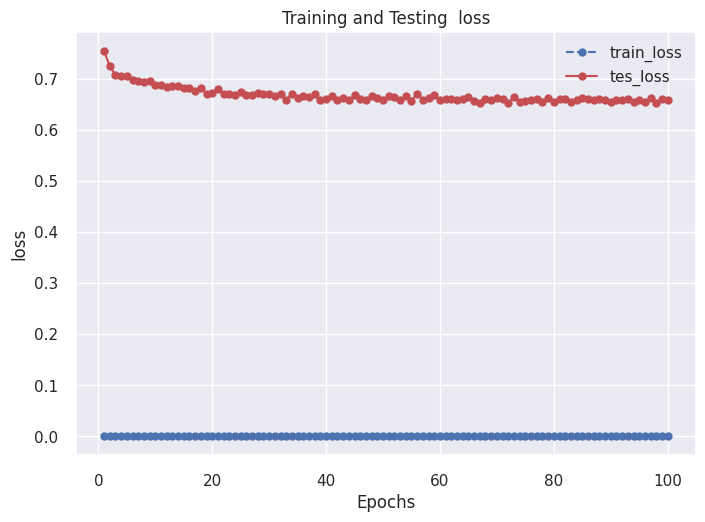

In [85]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    tes_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, tes_metrics, 'ro-')
    plt.title('Training and Testing  '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'tes_'+metric])
    plt.show()
plot_metric(history, 'loss')

Even when the loss in both: training and testing, show a decreasing trend, the metrics reflect that the model doesn't have a good fit specially detecting the admitted patients.

#### Model comparison


| Model |  Precision | Recall| F1 |
| --- | --- | --- | --- |
|Logistic Regression           |0.333  |0.004 |0.007|
|Weighted Logistic Regression  |0.121  |0.595 |0.202 |
|Artificial Neuronal Network   |0.110  |0.570 | 0.180 |

Comparing the models, any of them have a good generalization for the admitted classification.

## VI. Oversampling 

Unbalanced data substantially compromises the learning process, since most of the standard machine learning algorithms expect balanced class distribution or an equal misclassification cost. I worked with the package [imbalanced-learn](https://github.com/scikit-learn-contrib/imbalanced-learn) which offers a number of re-sampling techniques, in order to apply the SMOTE methodology where the data balancing can be performed by oversampling such that new samples are generated the smallest class to reach the balancing ratio.

In [87]:
sm=SMOTE(random_state=42)
X_res, y_res=sm.fit_resample(X,y)
print('Original train dataset shape %s' % Counter(y))
print('Resampled train dataset shape %s' % Counter(y_res))

Original train dataset shape Counter({0: 52111, 1: 4084})
Resampled train dataset shape Counter({1: 52111, 0: 52111})


In [88]:
X=dataset.drop([ 'Unnamed: 0','encounter_id', 'patient_nbr','readmitted', 'gender_Female'] , axis=1)
y=dataset['readmitted']

In [89]:
sm=SMOTE(random_state=42)
X_res, y_res=sm.fit_resample(X,y)
print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 52111, 1: 4084})
Resampled dataset shape Counter({1: 52111, 0: 52111})


Splitting the dataset in training and testing sets.

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_res, 
                                                    y_res,
                                                    test_size=0.2,
                                                    stratify=y_res,
                                                    random_state=42)
print('Training samples: {}'.format(X_train.shape[0]))
print('Testing samples: {}'.format(X_test.shape[0]))
print('Number of features: {}'.format(X_train.shape[1]))
print('Training outcome distribution: {}'.format(np.bincount(y_train)))
print('Testing outcome distribution: {}'.format(np.bincount(y_test)))

Training samples: 83377
Testing samples: 20845
Number of features: 52
Training outcome distribution: [41688 41689]
Testing outcome distribution: [10423 10422]


In order to identify the best parameters for the models, I am going to use a grid search, it's imporant to realize that this part will be time consuming since the algorithm compare different models using list of parameters.

In [91]:
def best_model (model, parameter_grid):
    def grid_search(X_train, y_train, clf, param_grid, k):
        models=GridSearchCV(clf, 
                       param_grid=param_grid, 
                       cv=k,
                       return_train_score=True)
        models=models.fit(X_train,y_train)
        return models

    param_grid = parameter_grid

    clf = model
    gsearch = grid_search(X_train, y_train, clf, param_grid, k=3)

    print(f'Best hyperparameters:\n {gsearch.best_params_}')
    print(f'Best score (validation): {gsearch.best_score_}')

#### 1. Logistic Regression Model

In [92]:
logistic_model = LogisticRegression(max_iter=10000, random_state=0, class_weight='balanced')
logistic_parameter_grid = {'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs']}
best_model (logistic_model, logistic_parameter_grid)

Best hyperparameters:
 {'solver': 'newton-cg'}
Best score (validation): 0.9513894580933724


In [94]:
X_train.shape

(83377, 52)

In [95]:
classifier = LogisticRegression(max_iter=10000,random_state=0, class_weight='balanced', solver='newton-cg') ##lbfgs is the  solver defaulf
classifier.fit(X_train, y_train)
over_logistic_prediction = classifier.predict(X_test)
model_performance(over_logistic_prediction)

Confusion Matrix: 
 [[10417     6]
 [ 1013  9409]] 

True Negative: 10417
False Positive: 6
False Negative: 1013
True Positive: 9409 

Precision: 0.999
Recall: 0.903
F_1: 0.949


This model reflects a good generalization for both clases and the biggest advantages is that it is interpretable which allow us to identify the risk and protective factors.

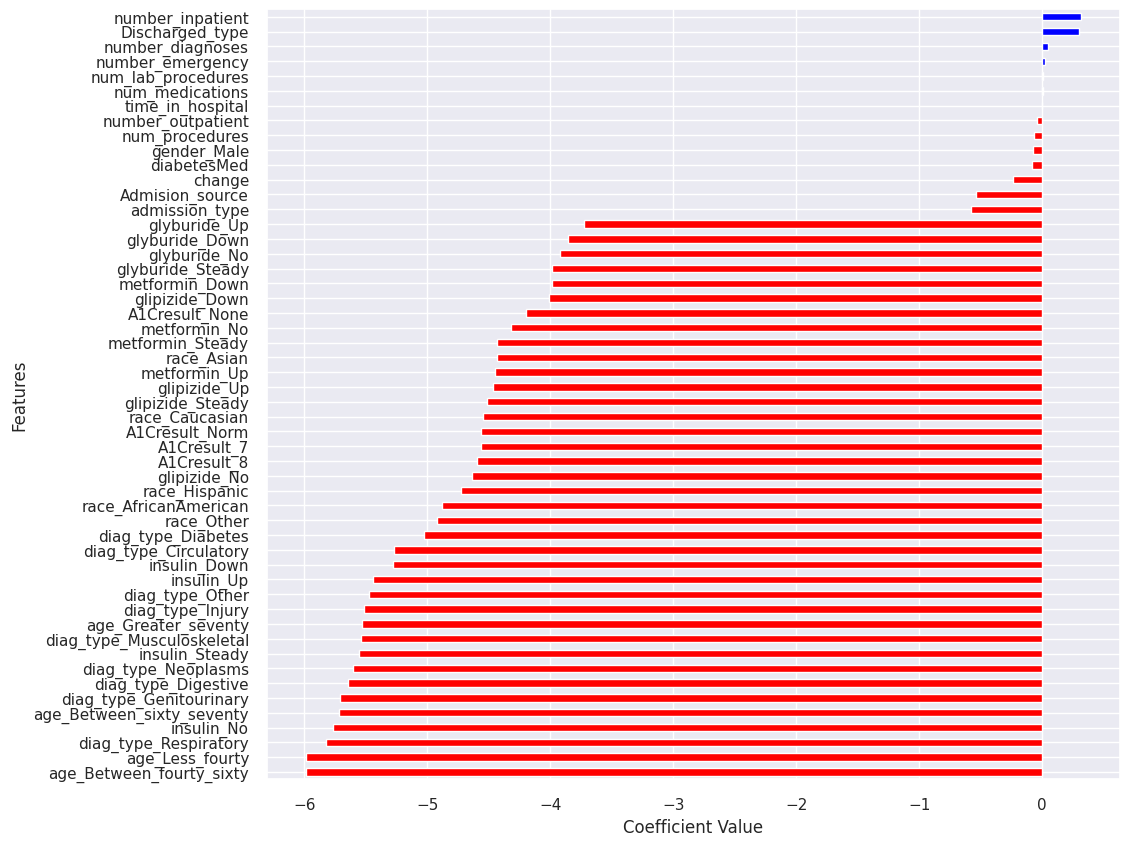

In [96]:
coeff = list(classifier.coef_[0])
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['coef'] = coeff
features.sort_values(by=['coef'], ascending=True, inplace=True)
features['positive'] = features['coef'] > 0
features.set_index('Features', inplace=True)
features.coef.plot(kind='barh', figsize=(11, 10),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Coefficient Value')
plt.show()

In [97]:
features['exp_coef'] = np.exp(features['coef'])

p_values= list(f_regression(X_train, y_train,center=True)[1])
f= list(f_regression(X_train, y_train,center=True)[0])
features['p-values'] = p_values
features['f1']=f
features=features.drop(['positive'], axis=1)
features

,coef,exp_coef,p-values,f1
Features,,,,
age_Between_fourty_sixty,-5.987146,0.002511,3.527464e-23,98.396525
age_Less_fourty,-5.983296,0.002521,1.791801e-62,278.733375
diag_type_Respiratory,-5.822925,0.002959,2.530774e-219,1005.333413
insulin_No,-5.762687,0.003143,3.058473e-53,236.250247
age_Between_sixty_seventy,-5.714267,0.003299,2.140684e-51,227.766105
diag_type_Genitourinary,-5.710857,0.003310,1.080315e-22,96.177756
diag_type_Digestive,-5.641385,0.003548,4.545800e-143,651.114645
diag_type_Neoplasms,-5.605871,0.003676,1.016732e-69,312.108720
insulin_Steady,-5.553109,0.003875,0.000000e+00,1777.667299


### 2. KNeighbors

No parameter technique, the classification rule checks the closest k-neighbors and based on the distribution within classes classify the new observation. 

In [98]:
kn_model = KNeighborsClassifier()
kn_parameter_grid = {'n_neighbors':[2,5, 10, 50]}
best_model (kn_model, kn_parameter_grid)

Best hyperparameters:
 {'n_neighbors': 2}
Best score (validation): 0.8935077877841078


In [99]:
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)
k_prediction = classifier.predict(X_test)
model_performance(k_prediction)

Confusion Matrix: 
 [[ 8695  1728]
 [   92 10330]] 

True Negative: 8695
False Positive: 1728
False Negative: 92
True Positive: 10330 

Precision: 0.857
Recall: 0.991
F_1: 0.919


This model is better classifying admitted than non-admitted according to the precission and recall comparision.

### 3. Decision Tree Classifier

Non-parametric supervised learning machine learning algorithm invariant under scaling, create biased trees if some classes dominate for that reason was not implemented with the unbalance dataset.

In [100]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_parameter_grid = {"max_depth": range(5, 60), "criterion": ["gini", "entropy"],}
best_model (tree_model, tree_parameter_grid)

Best hyperparameters:
 {'criterion': 'entropy', 'max_depth': 18}
Best score (validation): 0.9173632680897086


In [101]:
tree_model = DecisionTreeClassifier(max_depth=19, criterion='entropy',random_state=42) # vamos a usar un árbol de profundidad 2
tree_model.fit(X_train, y_train)
pred_tree=tree_model.predict(X_test) 
model_performance(pred_tree)

Confusion Matrix: 
 [[9648  775]
 [ 839 9583]] 

True Negative: 9648
False Positive: 775
False Negative: 839
True Positive: 9583 

Precision: 0.925
Recall: 0.919
F_1: 0.922


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


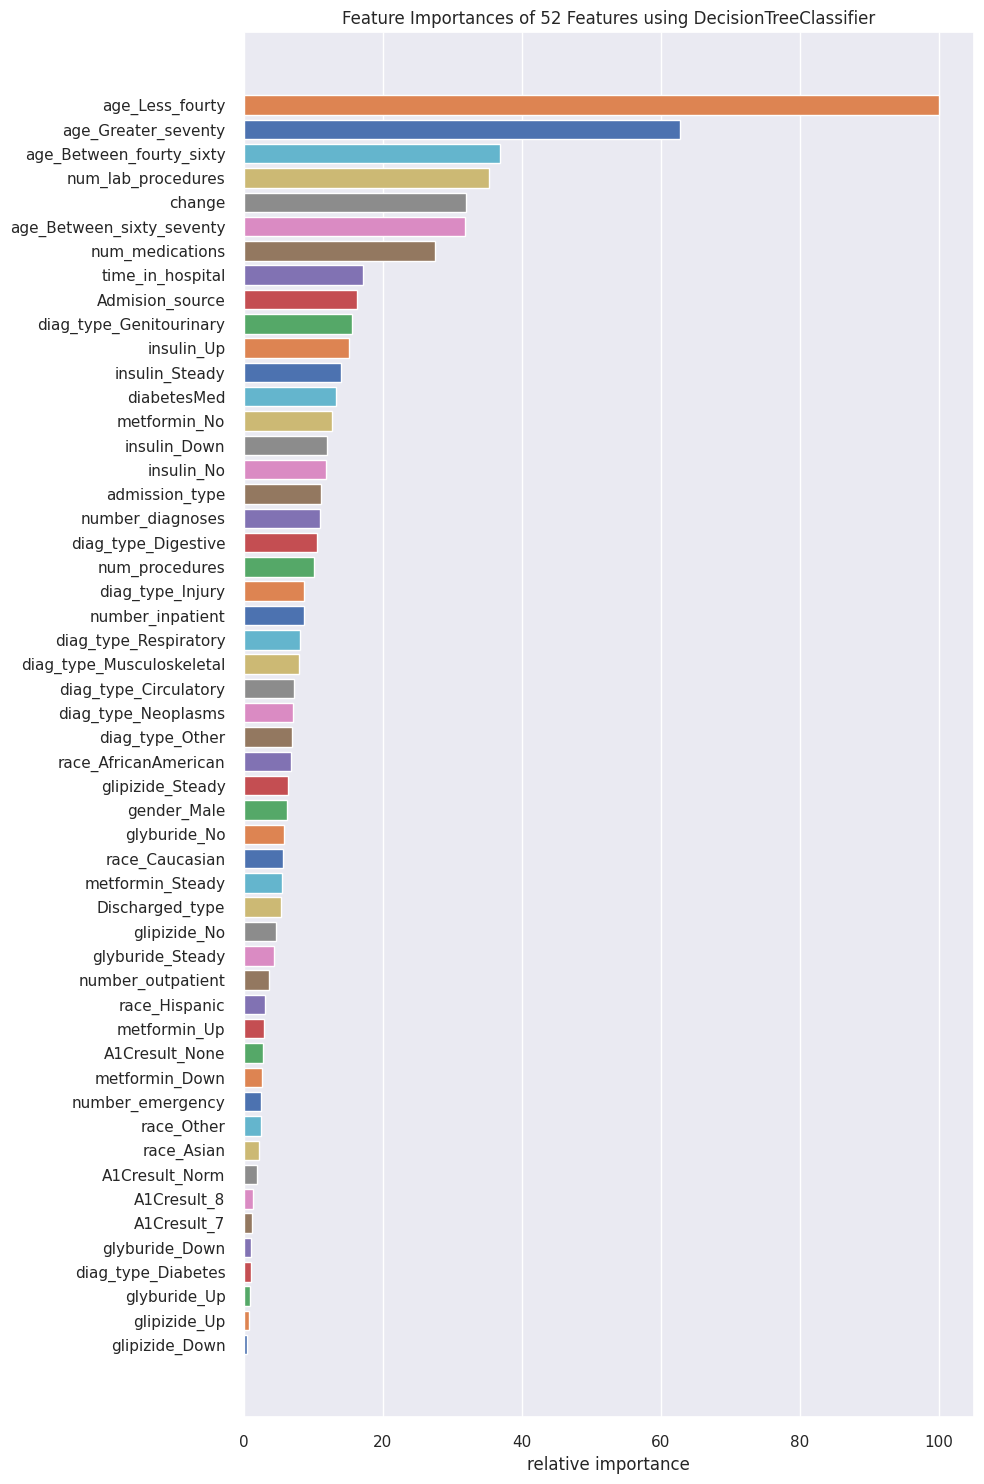

In [102]:
plt.figure(figsize=(10,15))
viz = FeatureImportances(tree_model)
viz.fit(X_res, y_res)
viz.show()
plt.show()

This model classify with a similar goodness both of the admitted classes.

### 4. Random Forest

Combine average of several individual trees. The predictions of a single tree are highly sensitive to noise in its training set, the average of many trees is not, as long as the trees are not correlated.

In [103]:
random_forest_model = RandomForestClassifier(random_state=0)
random_forest_param_grid = {"criterion": ["gini", "entropy"],
             "max_depth": range(5, 40)} #estaba en 60
best_model (random_forest_model, random_forest_param_grid)

Best hyperparameters:
 {'criterion': 'gini', 'max_depth': 34}
Best score (validation): 0.9591613920787297


In [104]:
clf=RandomForestClassifier(criterion='entropy', max_depth=32,random_state=0)
clf.fit(X_train,y_train)
random_f_prediction=clf.predict(X_test)
model_performance(random_f_prediction)

Confusion Matrix: 
 [[10406    17]
 [  811  9611]] 

True Negative: 10406
False Positive: 17
False Negative: 811
True Positive: 9611 

Precision: 0.998
Recall: 0.922
F_1: 0.959


In [105]:
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

num_lab_procedures           0.062464
num_medications              0.054396
insulin_Steady               0.046188
age_Greater_seventy          0.044600
age_Between_fourty_sixty     0.043962
insulin_No                   0.039532
time_in_hospital             0.039172
age_Between_sixty_seventy    0.036359
number_diagnoses             0.028896
num_procedures               0.028405
metformin_No                 0.028299
age_Less_fourty              0.027046
diag_type_Other              0.025046
race_Caucasian               0.024724
diag_type_Respiratory        0.024503
change                       0.024332
race_AfricanAmerican         0.023912
diag_type_Circulatory        0.023331
insulin_Down                 0.023297
Admision_source              0.022946
admission_type               0.022184
insulin_Up                   0.021788
diabetesMed                  0.021172
diag_type_Digestive          0.020608
gender_Male                  0.020136
number_inpatient             0.019078
metformin_St

This is the best model for classification purposes, however the Random forest is a black box since we dont have a path to describe the variables inside the model in case that we want to identify the risk and protective variables.

#### Model Comparision

| Model |  Precision | Recall| F1 |
| --- | --- | --- | --- |
|Logistic Regression            | 0.999| 0.904 | 0.949 |
|KNeighbors   |  0.857 | 0.991 | 0.919 |
|Decision Tree Classifier    | 0.927 | 0.920 | 0.923 |
|Random Forest  |  0.998 | 0.922 | 0.958 |


Depending on the purpose of the research we have two models with a really good generalization:
* If the main task is classify the patients minimizing the error of readmission, my suggestion is to use the Random forest model since it has the best performance.
* For identifying risk and protective factor my recommendation is to use the Logistic regression since it is the second best model and it is interpretable.

In [106]:
time_end = time.time()
print(f"\nTotal running time: {round((time_end - time_start)/60,1)} minutes")


Total running time: 89.9 minutes


## VII. Insights

The insights below are associated with the logistic model obtained with the oversampling approach.



#### Protective factors
- Admission type: People who were not in Emergency decrease their odds in 43% of being readmitted compared with those in Emergency. 
- Change: Changing the diabetics medications decrease in 20% the  odds of being readmitted.
- DiabetesMed: For patients with any diabetic medication prescribed the odds of being readmitted decrease in 9%.
- Gender: Being male decrease in 7% the odds of being readmitted.
- Number of procedures: For each adittional procedures different than lab tests performed during the encounter the odds of being readmitted decrease in 6%.
- Number outpatient: for each adittional outpatient visit the odds of being readmitted decrease in 4%.
- Time in hospital: For each adittional day in the hospital the odds of being readmitted decrease in 1%


#### Risk factors
- Number inpatient: for each aditional number of inpatient visits the odds of being readmitted increase in 37%
- Discharged type: when the discharge is not at home the odds of being readmitted increase in 34%
- Number diagnoses: for each aditional number of diagnoses reported into the system the odds of being readmitted increase in 5%
- Number emergency: for each aditional number of emergency visits of the patient in the year preceding the odds of being readmitted increase in 3%
- Age factors: Increasing the age increase the chance of being readmitted.
- Primary diagnostic: when the primary diagnostic is diabetes the patiend has a higher odds of being readmitted, follow by Circulatory diagnostic. The other ones dont reflect a sigificative effect in being readmitted.

## VIII. Conclusions

* Using oversampling to balance the classes guarantee a better performance since most of the machine learning algorithms needs a similar proportion into the classes.
* After checking with various machine learning models, for classify the patients minimizing the error of readmission, my suggestion is to use the *Random forest* model since it has the best performance.
* For identifying risk and protective factors, my suggestion is the *Logistic Regression* model since it is the second best model and it is interpretable.
    * The top three of protective factors are: not being in Emergency as admission type, have any change in the diabetics medications and  have any diabetic medication.
    * When the patient has been more in contact with the hospital: more days in the hospital, more procedures or more outpatient visits, the odds of being readmitted decrease.
    * The top three of risk factors are: number of inpatient visits, the discharge is not at home,  number of diagnoses reported into the system.

## IX. Experimentation


* Use random search instead of grid search
* Use a parameter optimization framework like Optuna
* Expand the number of parameters to tune
* Experiment with other models such as XGboost...
* Ensemble models: Majority...
* Apply SMOTE only to the training subset
* Improve the neural network architecture: neurons, layers...
* Present metrics for both training and testing to contrast and avoid overfitting
* Include learning and validation curves
* AWS: Random Cut Forest